Local Search: 
Seed 8963: Best fitness = -1.766034550371159, Solution = [0.0514 0.0799 0.1914 0.1637 0.1434 0.1941 0.0746 0.0645 0.0326 0.0045]

Seed 5027: Best fitness = -0.349984276326461, Solution = [0.0837 0.0882 0.0701 0.0586 0.0407 0.0243 0.0406 0.5001 0.0474 0.0463]

Seed 3611: Best fitness = -0.35173266192869673, Solution = [0.0813 0.0326 0.079  0.0604 0.0337 0.0684 0.0283 0.5    0.0815 0.0347]

Seed 5533: Best fitness = -1.3299637727279672, Solution = [0.1064 0.1212 0.0422 0.1033 0.0851 0.123  0.1222 0.1282 0.1382 0.0302]

Seed 1291: Best fitness = -0.35473005857450607, Solution = [0.0602 0.0648 0.0846 0.048  0.0904 0.0313 0.0136 0.5    0.0979 0.0092]

Seed 5027 yielded the best solution with the highest fitness:
Best Fitness = -0.349984276326461
Best Solution: [0.0837 0.0882 0.0701 0.0586 0.0407 0.0243 0.0406 0.5001 0.0474 0.0463]

The graph:



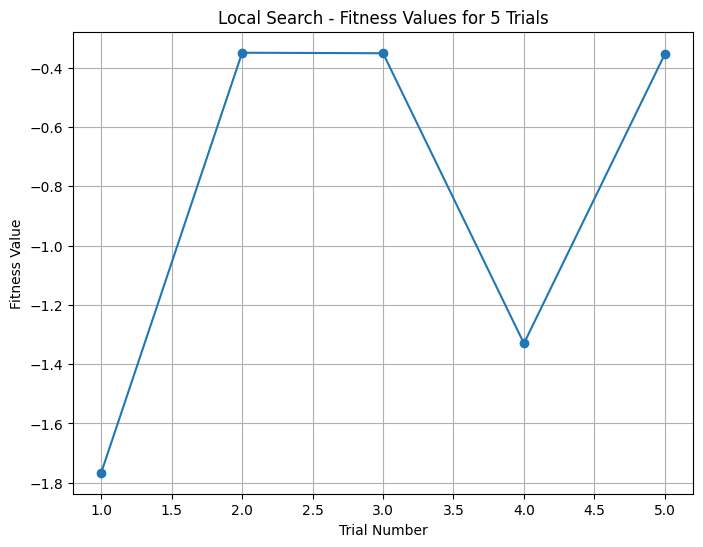



Genetic Algorithm: 
-----------------------------------------------------------------------------------------------

Experiment 1 - Best Solutions: [array([0.1257, 0.0085, 0.0185, 0.1526, 0.1327, 0.0665, 0.0585, 0.1997,
       0.0441, 0.1931]), array([0.1047, 0.1071, 0.121 , 0.1206, 0.0777, 0.105 , 0.0798, 0.086 ,
       0.1189, 0.0793]), array([0.1364, 0.0196, 0.038 , 0.1689, 0.0049, 0.1332, 0.1375, 0.152 ,
       0.0689, 0.1407]), array([0.0815, 0.0167, 0.0754, 0.1482, 0.1582, 0.2181, 0.0225, 0.2235,
       0.044 , 0.0118]), array([0.0767, 0.0091, 0.1427, 0.0633, 0.0596, 0.09  , 0.0343, 0.1947,
       0.1985, 0.1312])]
Experiment 1 - Best Fitnesses: [-0.8167664296002474, -1.7832787123435399, -1.0332075427973333, -0.7780474153818449, -0.9187132837511194]
Experiment 1 - seeds: [5413, 9630, 2664, 228, 562]
Experiment 1 - Best Seed: 228
Experiment 1 - Best Solutions: [0.0815 0.0167 0.0754 0.1482 0.1582 0.2181 0.0225 0.2235 0.044  0.0118]
Experiment 1 - Best fitness: -0.7780474153818449

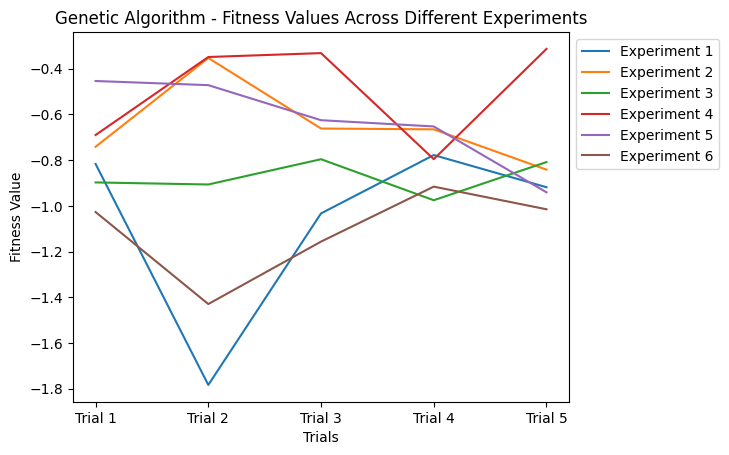

In [1]:
import random
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# # ------------------------Problem instance information------------------------
budget = 250000
num_assets = 10
Rf = 0.06
expected_returns = [0.003, 0.003, 0.001, 0.006, 0.002, 0.001, 0.0004, 0.01, 0.004, 0.02]
cov_matrix = np.array([
    [0.000229, 0.000028, -0.000005, 0.000015, -0.000017, 0.000000, -0.000004, -0.000089, 0.000022, -0.000003],
    [0.000028, 0.000302, 0.000017, 0.000013, -0.000003, 0.000002, -0.000003, 0.000053, 0.000002, -0.000004],
    [-0.000005, 0.000017, 0.001759, -0.000016, 0.000011, 0.000000, -0.000029, -0.004438, 0.000044, 0.000007],
    [0.000015, 0.000013, -0.000016, 0.015125, 0.000181, 0.003710, -0.000040, -0.000431, 0.000143, 0.000023],
    [-0.000017, -0.000003, 0.000011, 0.000181, 0.000300, 0.000061, -0.000015, 0.000341, -0.000006, 0.000008],
    [0.000000, 0.000002, 0.000000, 0.003710, 0.000061, 0.001209, -0.000012, -0.000092, 0.000033, 0.000018],
    [-0.000004, -0.000003, -0.000029, -0.000040, -0.000015, -0.000012, 0.000305, 0.000158, -0.000004, 0.000025],
    [-0.000089, 0.000053, -0.004438, -0.000431, 0.000341, -0.000092, 0.000158, 0.092052, -0.000040, 0.000019],
    [0.000022, 0.000002, 0.000044, 0.000143, -0.000006, 0.000033, -0.000004, -0.000040, 0.000149, 0.000007],
    [-0.000003, -0.000004, 0.000007, 0.000023, 0.000008, 0.000018, 0.000025, 0.000019, 0.000007, 0.000322]
])

# ---------------------------------Phase1---------------------------------------

def Create_Initial_Population_function(num_assets, population_size, seed):
  np.random.seed(seed)
  return np.round(np.random.rand(population_size, num_assets), 4)

# ------------------------------------------------------------------------------

def Repair_function(matrix):
    # Initialize the list to store normalized rows
    normalized_matrix = []

    for row in matrix:
        # Calculate the sum of the row
        # print(f"\nmatrix in repair: {matrix}")
        row_sum = sum(row)

        if row_sum != 1:
            # Normalize the row and Round to 4 decimal places
            normalized_row = [round(x / row_sum, 4) for x in row]

            # Append the normalized row
            normalized_matrix.append(normalized_row)
        else:
            # Row is already normalized, no need to normalize
            normalized_matrix.append(row)

    # After normalization (if needed), apply the clipping to the entire matrix
    # Ensure every weight within the range [0, 1] and round to 4 decimal places
    clipped_matrix = np.clip(normalized_matrix, 0, 1).round(4)
    # print(f"clipped_matrix: {clipped_matrix[0]}")

    return clipped_matrix

# ------------------------------------------------------------------------------


def Compute_Fitness_function(repaired_matrix, expected_returns, cov_matrix, Rf):
    if(repaired_matrix.shape == (1, 10)):
      repaired_matrix = repaired_matrix[0]
    matrix_mu = np.dot(repaired_matrix, expected_returns)
    portfolio_v = np.sqrt(np.dot(repaired_matrix, np.dot(cov_matrix, repaired_matrix)))
    objectiveFunc = (matrix_mu - Rf) / portfolio_v
    return objectiveFunc


# ---------------------------------Local Search---------------------------------


def generate_neighbor(solution, i):
    neighbor = solution.copy()
    # print(f"generate_neighbor: neighbor = {neighbor}")
    neighbor[i] = 1 - neighbor[i]
    # print(f"generate_neighbor: neighbor = {neighbor}")
    return neighbor

# ------------------------------------------------------------------------------

def local_search(repaired_matrix, expected_returns, cov_matrix, Rf, max_evaluations, seed):
    num_assets = len(expected_returns)
    evaluations = 0
    local_maximum_solution = None
    local_maximum_fitness = None
    current_solution = repaired_matrix[0]
    current_fitness = Compute_Fitness_function(current_solution, expected_returns, cov_matrix, Rf)
    evaluations += 1

    while evaluations < max_evaluations:
        is_local_maximum = False

        while True:
            neighbors = [generate_neighbor(current_solution, i) for i in range(num_assets)]
            repaired_neighbors = [Repair_function([neighbor]) for neighbor in neighbors]
            neighbors_fitness = [Compute_Fitness_function(n, expected_returns, cov_matrix, Rf) for n in repaired_neighbors]
            evaluations += len(neighbors)

            max_neighbor_fitness = max(neighbors_fitness)
            max_neighbor_solution = repaired_neighbors[np.argmax(neighbors_fitness)][0]


            if max_neighbor_fitness > current_fitness:
              current_fitness = max_neighbor_fitness
              current_solution = max_neighbor_solution
            else:
              # local max
              local_maximum_solution = current_solution
              local_maximum_fitness = current_fitness
              is_local_maximum = True
              break

            if evaluations >= max_evaluations:
              break
            # end inner loop

        if(is_local_maximum):
          seed = np.random.randint(0, 10000)
          matrix = Create_Initial_Population_function(num_assets, 1, seed)
          repaired_matrix = Repair_function(matrix)
          current_solution = repaired_matrix[0]
          current_fitness = Compute_Fitness_function(current_solution, expected_returns, cov_matrix, Rf)
          evaluations += 1
    return current_solution, current_fitness

# ------------------------------------------------------------------------------

max_evaluations = 10000
results = []
all_trials_fitness = []

for i in range(5):
    seed = np.random.randint(0, 10000)
    matrix = Create_Initial_Population_function(num_assets, 1, seed)
    repaired_matrix = Repair_function(matrix)
    solution, fitnessV = local_search(repaired_matrix, expected_returns, cov_matrix, Rf, max_evaluations, seed)
    all_trials_fitness.append(fitnessV)
    results.append((seed, solution, fitnessV))

print("Local Search: ")
for seed, solution, fitnessV in results:
    print(f"Seed {seed}: Best fitness = {fitnessV}, Solution = {solution}\n")

max_fitness_entry = max(results, key=lambda x: x[2])
max_seed, max_solution, max_fitness = max_fitness_entry
print(f"Seed {max_seed} yielded the best solution with the highest fitness:")
print(f"Best Fitness = {max_fitness}")
print(f"Best Solution: {max_solution}")


# -------------------------------Local search graph-----------------------------
# Trial numbers
trial_numbers = list(range(1, len(all_trials_fitness) + 1))
print("\nThe graph:\n")
# Create a line graph
plt.figure(figsize=(8, 6))
plt.plot(trial_numbers, all_trials_fitness, marker='o', linestyle='-')
plt.title('Local Search - Fitness Values for 5 Trials')
plt.xlabel('Trial Number')
plt.ylabel('Fitness Value')
plt.grid(True)

# Show the graph
plt.show()


# ------------------------------Genetic Algorithm-------------------------------


# Perform selection to choose parent solutions #---2
def selection(population):
    parent_a = random.choice(population)
    parent_b = random.choice(population)
    fitness_a = Compute_Fitness_function(parent_a, expected_returns, cov_matrix, Rf)
    fitness_b = Compute_Fitness_function(parent_b, expected_returns, cov_matrix, Rf)
    if fitness_a == fitness_b:
     selected_parent = random.choice([parent_a, parent_b])
    elif fitness_a > fitness_b:
     selected_parent = parent_a
    else:
     selected_parent = parent_b
    return selected_parent


# ------------------------------------------------------------------------------

# Perform crossover to create offspring solutions #---3
def crossover(parent_a, parent_b):
    if len(parent_a) != len(parent_b):
        raise ValueError("Parents must have the same length for crossover")

    crossover_point = random.randint(0, len(parent_a) - 1)

    child_e = np.concatenate((parent_a[:crossover_point], parent_b[crossover_point:]))
    child_f = np.concatenate((parent_b[:crossover_point], parent_a[crossover_point:]))

    return child_e, child_f


# ------------------------------------------------------------------------------

# Perform mutation on a solution #---4
def mutation(solution, MK):
    K = int(MK[1])

    for _ in range(K):
        gene = random.randint(0, len(solution) - 1)
        mutated_value = round(random.uniform(0, 1), 4)
        solution[gene] = mutated_value

        # Normalize only the mutated element
        solution_sum = sum(solution)
        if solution_sum != 1:
            solution[gene] = round(solution[gene] / solution_sum, 4)

    return solution

# ------------------------------------------------------------------------------


# Replace the weakest solutions in the population with the offspring solutions #---5
def weakest_replacement(population, offspring):
    # Evaluate fitness for each individual in the population
    counter = 0;
    for individual in population:
      fitness_values = np.array(Compute_Fitness_function(individual, expected_returns, cov_matrix, Rf))
      counter +=1
    # Find the index of the worst solution
    worst_index = np.argmin(fitness_values)

    # Replace the worst individual with the new offspring
    population[worst_index] = offspring

    return population, counter

# ------------------------------------------------------------------------------


# Define GA parameters
# max_fitness_evaluations = 10000 #---6
populationSize = 0
# fitness_evaluations = 0
# Genetic Algorithm main loop
def genetic_algorithm(population_size, crossover_operator, mutation_operator, num_trials, expected_returns, num_assets): # seed
    best_solutions = []  # Store the best solution for each trial
    population_fitnesses = []
    populationSize = population_size
    seeds = []
    for _ in range(num_trials):
        seed = np.random.randint(0,10000)
        population = Create_Initial_Population_function(num_assets, population_size, seed)  # Initialize the population
        # print(f"population: {population}")
        population = Repair_function(population)
        # print(f"population repaired: {population}")
        fitness_evaluations = 0  # Initialize fitness evaluations counter

        for i in range(population_size):
            Compute_Fitness_function(population[i], expected_returns, cov_matrix, Rf) #1
            fitness_evaluations += 1

        while fitness_evaluations <= max_evaluations:
            # print(f"fitness_evaluations: {fitness_evaluations}")
            parent_a = selection(population)
            parent_b = selection(population)

            if crossover_operator == 'none':
                if mutation_operator == 'none':
                    population, counter = weakest_replacement(population, parent_a)  # Replace weak solution with parent A
                    fitness_evaluations += counter
                    population, counter = weakest_replacement(population, parent_b)  # Replace weak solution with parent B
                    fitness_evaluations += counter
                else:
                    child_u = mutation(parent_a, mutation_operator)  # Perform mutation on parent A
                    population = Repair_function(population)
                    child_v = mutation(parent_b, mutation_operator)  # Perform mutation on parent B
                    population = Repair_function(population)
                    fitness_u = Compute_Fitness_function(child_u, expected_returns, cov_matrix, Rf)  # Evaluate fitness of child A
                    fitness_v = Compute_Fitness_function(child_v, expected_returns, cov_matrix, Rf)  # Evaluate fitness of child B
                    fitness_evaluations += 2  # Increment fitness evaluation counter
                    population, counter = weakest_replacement(population, child_u)  # Replace weak solution with child A
                    fitness_evaluations += counter
                    population, counter = weakest_replacement(population, child_v)  # Replace weak solution with child B
                    fitness_evaluations += counter
            else:

                if mutation_operator == 'none':
                 child_e, child_f = crossover(parent_a, parent_b)
                 population = Repair_function(population)
                 population, counter = weakest_replacement(population, child_e)  # Replace weak solution with child A
                 fitness_evaluations += counter
                 population, counter = weakest_replacement(population, child_f)  # Replace weak solution with child B
                 fitness_evaluations += counter
                else:
                 child_e, child_f = crossover(parent_a, parent_b)  # Perform crossover
                 population = Repair_function(population)
                 child_u = mutation(child_e, mutation_operator)  # Perform mutation on child A
                 population = Repair_function(population)
                 child_v = mutation(child_f, mutation_operator)  # Perform mutation on child B
                 population = Repair_function(population)
                 fitness_u = Compute_Fitness_function(child_u, expected_returns, cov_matrix, Rf)  # Evaluate fitness of child A
                 fitness_v = Compute_Fitness_function(child_v, expected_returns, cov_matrix, Rf)  # Evaluate fitness of child B
                 fitness_evaluations += 2  # Increment fitness evaluation counter
                 population, counter = weakest_replacement(population, child_u)  # Replace weak solution with child A
                 fitness_evaluations += counter
                 population, counter = weakest_replacement(population, child_v)  # Replace weak solution with child B
                 fitness_evaluations += counter


        # fitness for each individual in the population
        population_fitness = [Compute_Fitness_function(individual, expected_returns, cov_matrix, Rf) for individual in population]
        # Find the maximum fitness value in the population
        max_population_fitness = max(population_fitness)
        # Retrieve the best solution using the index of the maximum fitness value
        best_solution = population[np.argmax(population_fitness)]
        # apped the best solution for this trial
        best_solutions.append(best_solution)
        # append the seed used
        seeds.append(seed)
        # appened the fitness
        population_fitnesses.append(max_population_fitness)

    return best_solutions, population_fitnesses, seeds

# ------------------------------------------------------------------------------


# Define experiment settings using dictionaries
num_trials = 5
experiments = {
    1: {
        'population_size': 10,
        'crossover_operator': "Single-Point Crossover",
        'mutation_operator': "M1",
        'num_trials': num_trials
    },
    2: {
        'population_size': 100,
        'crossover_operator': "Single-Point Crossover",
        'mutation_operator': "M1",
        'num_trials': num_trials
    },
    3: {
        'population_size': 10,
        'crossover_operator': "Single-Point Crossover",
        'mutation_operator': "M5",
        'num_trials': num_trials
    },
    4: {
        'population_size': 100,
        'crossover_operator': "Single-Point Crossover",
        'mutation_operator': "M5",
        'num_trials': num_trials
    },
    5: {
        'population_size': 10,
        'crossover_operator': "none",
        'mutation_operator': "M5",
        'num_trials': num_trials
    },
    6: {
        'population_size': 10,
        'crossover_operator': "Single-Point Crossover",
        'mutation_operator': "none",
        'num_trials': num_trials
    },

}
fitness_values = []
all_best_fitness = []
all_best_solution = []
experiments_num = []

print("\n\nGenetic Algorithm: ")
# Loop through each experiment settings and execute the genetic_algorithm function
for experiment_num, params in experiments.items():
    population_size = params['population_size']
    crossover_operator = params['crossover_operator']
    mutation_operator = params['mutation_operator']
    num_trials = params['num_trials']

    # Run genetic_algorithm function for each experiment
    best_solutions, population_fitnesses, seeds = genetic_algorithm(population_size, crossover_operator, mutation_operator, num_trials, expected_returns, num_assets) # seed
    print("-----------------------------------------------------------------------------------------------")
    print(f"\nExperiment {experiment_num} - Best Solutions:", best_solutions)
    print(f"Experiment {experiment_num} - Best Fitnesses:", population_fitnesses)
    fitness_values.append(population_fitnesses)

    best_fitness = max(population_fitnesses)
    all_best_fitness.append(best_fitness)
    best_solution_index = population_fitnesses.index(best_fitness)
    best_solution = best_solutions[best_solution_index]
    all_best_solution.append(best_solution)
    experiments_num.append(experiment_num)

    print(f"Experiment {experiment_num} - seeds: {seeds}")
    print(f"Experiment {experiment_num} - Best Seed:", seeds[best_solution_index])
    print(f"Experiment {experiment_num} - Best Solutions:", best_solution)
    print(f"Experiment {experiment_num} - Best fitness:", best_fitness)
    print("\n")


best_fitness_final = max(all_best_fitness)
best_solution_index_final = all_best_fitness.index(best_fitness_final)
best_solution_final = all_best_solution[best_solution_index_final]
experiment_final = experiments_num[best_solution_index_final]

print("-----------------------------------------------------------------------------------------------")
print("\nGenetic Algorithm Final Result")
print(f"Best Experiment: {experiment_final}")
print(f"Best Solution: {best_solution_final}")
print(f"Best Fitness: {best_fitness_final}")

print("\nThe graph:\n")

# ---------------------------Genetic Algorithm graph----------------------------
# Create a line plot for each experiment
for i, values in enumerate(fitness_values):
    plt.plot(values, label=f'Experiment {i + 1}')

# Adding labels and title
plt.xlabel('Trials')
plt.ylabel('Fitness Value')
plt.title('Genetic Algorithm - Fitness Values Across Different Experiments')
plt.xticks(range(5), [f'Trial {i+1}' for i in range(5)])  # Adjust x-ticks for trials

# Adding legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Show the plot
plt.show()
